# ICU survivor prediction
# Machine Learning, Exercise 1
### 王敏行 id:2018012386 wangmx18@mails.tsinghua.edu.cn
**All following codes originally generated by myself.**
Please see rm.md before running this file.

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

x_tr1 = np.array(pd.read_csv('data1forEx1to4/train1_icu_data.csv'))
y_tr1 = np.array(pd.read_csv('data1forEx1to4/train1_icu_label.csv'))
x_tr2 = np.array(pd.read_csv('data1forEx1to4/train2_icu_data.csv'))
y_tr2 = np.array(pd.read_csv('data1forEx1to4/train2_icu_label.csv'))
x_ts1 = np.array(pd.read_csv('data1forEx1to4/test1_icu_data.csv'))
y_ts1 = np.array(pd.read_csv('data1forEx1to4/test1_icu_label.csv'))
x_ts2 = np.array(pd.read_csv('data1forEx1to4/test2_icu_data.csv'))
y_ts2 = np.array(pd.read_csv('data1forEx1to4/test2_icu_label.csv'))

def get_index(x,y):
    id0 = np.array([index for (index, value) in enumerate(y) if value ==0])
    id1 = np.array([index for (index, value) in enumerate(y) if value ==1])
    s1=x[id0]
    s2=x[id1]
    return s1,s2


## Part2: perceptron

In [16]:
yp_tr1 = y_tr1*2-1 #0,1 to -1,1
yp_tr2 = y_tr2*2-1

def train_P(x,y, max_itr=300, lr0=0.005, decay_lr=0):
    w = np.random.randn(1,x.shape[1])
    b=0

    acc=[]
    x0 = []
    for i in range(max_itr):
        lr = lr0/(1+decay_lr*i)
        for j in range(x.shape[0]):
            if y[j]*(np.dot(w,x[j,:])+b)<=0:
                w = w + lr*y[j]*x[j,:]
                b += lr*y[j]
        if i%10:
            res = pred_P(x, w,b)
            acc.append(accuracy_score(y,res*2-1))
            x0.append(i)
        
    return w,b,x0,acc

def pred_P(x, w, b):
    pred = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
        out = (np.dot(w,x[i,:])+b)
        if out>0:
            pred[i,0]=1
    return pred

acc on trainset1: 0.669


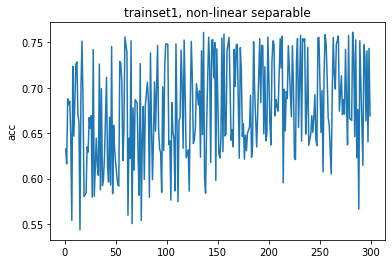

In [17]:
w1,b1,t,acc = train_P(x_tr1, yp_tr1)
res1 = pred_P(x_tr1, w1,b1)
acc1 = accuracy_score(y_tr1,res1)
print('acc on trainset1:',acc1)

plt.figure()
plt.title('trainset1, non-linear separable')
plt.ylabel('acc')
plt.plot(t,acc)
plt.show()

### fixed vs variable learning rate

acc on trainset2: 0.8413559322033898


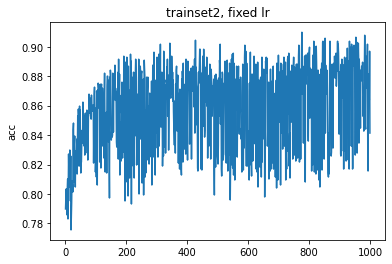

In [18]:
w2,b2,t,acc = train_P(x_tr2, yp_tr2, max_itr=1000, decay_lr=0)
res2 = pred_P(x_tr2, w2,b2)
acc2 = accuracy_score(y_tr2,res2)
print('acc on trainset2:',acc2)

plt.figure()
plt.title('trainset2, fixed lr')
plt.ylabel('acc')
plt.plot(t,acc)
plt.show()

acc on trainset2: 0.9111864406779661


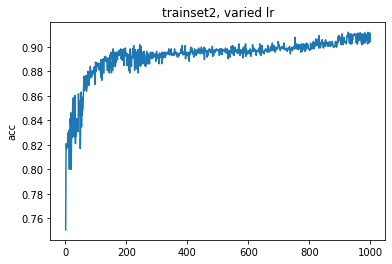

In [19]:
w2,b2,t,acc = train_P(x_tr2, yp_tr2, max_itr=1000, decay_lr=0.5)
res2 = pred_P(x_tr2, w2,b2)
acc2 = accuracy_score(y_tr2,res2)
print('acc on trainset2:',acc2)

plt.figure()
plt.title('trainset2, varied lr')
plt.ylabel('acc')
plt.plot(t,acc)
plt.show()

### Test the model trained on trainset2

In [20]:
w2,b2,t,acc = train_P(x_tr2, yp_tr2, max_itr=1000, decay_lr=0.5)
res2 = pred_P(x_tr2, w2,b2)
acc2 = accuracy_score(y_tr2,res2)
print('err on trainset2:',1-acc2)

pred1 = pred_P(x_ts1, w2, b2)
acc1 = accuracy_score(y_ts1, pred1)
pred2 = pred_P(x_ts2, w2, b2)
acc2 = accuracy_score(y_ts2, pred2)
print('testset1 err rate:',1-acc1)
print('testset2 err rate:',1-acc2)

np.savetxt('Perceptron_tr2_ts1.txt', pred1, fmt='%.0f')
np.savetxt('Perceptron_tr2_ts2.txt', pred2, fmt='%.0f')

err on trainset2: 0.10033898305084743
testset1 err rate: 0.23518687329079302
testset2 err rate: 0.19333333333333336


### Test the model trained on trainset1

In [21]:
w1,b1,t,acc = train_P(x_tr1, yp_tr1, max_itr=1000, decay_lr=0.5)
res1 = pred_P(x_tr1, w1,b1)
acc1 = accuracy_score(y_tr1,res1)
print('err on trainset1:',1-acc1)

pred1 = pred_P(x_ts1, w1, b1)
acc1 = accuracy_score(y_ts1, pred1)
pred2 = pred_P(x_ts2, w1, b1)
acc2 = accuracy_score(y_ts2, pred2)
print('testset1 err rate:',1-acc1)
print('testset2 err rate:',1-acc2)

np.savetxt('Perceptron_tr1_ts1.txt', pred1, fmt='%.0f')

err on trainset1: 0.25980000000000003
testset1 err rate: 0.26253418413855967
testset2 err rate: 0.25111111111111106
